In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import pickle as pkl
import seaborn as sns
from collections import defaultdict

In [43]:
from faircom.utils import prepare_data,calculate_mean, analytical_prediction, final2quota, analytical_prediction_2

In [44]:
#minority/majority colours
min_colour = "red"
maj_colour = "blue"

#proportional representation colour

prop_colour = "black"

#homophily_colours

#diverging red/green
het01_colour = "#de425b"
het025_colour = "#da8b8f"
rand05_colour = "#c6c6c6"
hom075_colour = "#8bab7c"
hom09_colour = "#488f31"

#diverging orange/purple
het01_colour = "#e66101"
het025_colour = "#fdb863"
rand05_colour = "#c6c6c6"
hom075_colour = "#b2abd2"
hom09_colour = "#5e3c99"

#sequential
#het01_colour = "#00ffff"
#het025_colour = "#00cfe3"
#rand05_colour = "#00a1c1"
#hom075_colour = "#007599"
#hom09_colour = "#004c6d"


five_colours = [het01_colour,het025_colour,rand05_colour,hom075_colour,hom09_colour]
two_colours = [het01_colour,hom09_colour]
three_colours = [het01_colour,rand05_colour,hom09_colour]



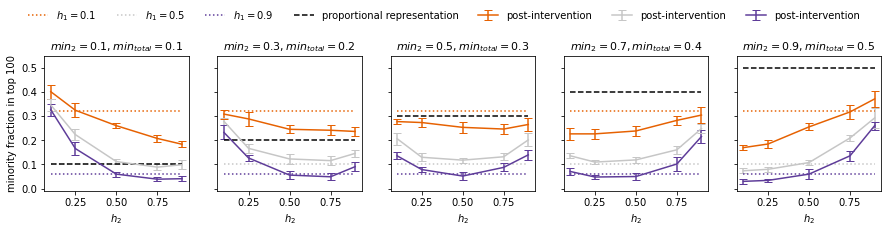

In [45]:
df_raw = pd.read_csv('results/ranking_results/results1.csv')
df1_raw = pd.read_csv('results/ranking_results/results2.csv')
coms = ['community 1']
k=100
df=prepare_data(df_raw,coms,k)
df1=prepare_data(df1_raw,coms,k)


com = 'community 1'
homophilies = [0.1, 0.25, 0.5, 0.75, 0.9]
minority_fraction = [0.1,0.2,0.3,0.4,0.5]
key = "homophilies"

fig, axs = plt.subplots(1,len(minority_fraction),figsize=(15, 3), sharey=True, sharex = True)
axs[0].set_ylabel("minority fraction in top 100")
for minority,ax in zip(minority_fraction,axs):
    ax.set_title(com)
    ax.set_ylim([-0.01, 0.55])
    ax.set_xlabel(r"$h_2$")
    title= "Full graph"
    df_curr = df1.loc[df1.minority == minority,:]
    colours = three_colours
    prop_base = []
    prop_base += len(homophilies) * [minority]
    for i in range(len(df.homophilies.unique())):
        minority_sizes = df.iloc[i]["minority_fractions"][0]
        homophily = float(df.iloc[i]['homophilies'])
        res_local=[]
        res_local += len(homophilies) * [float(df.iloc[i][com]["res_global"])]
        m_place, s_place = calculate_mean(i,homophilies,key, df_curr,com,"res_global")
        ax.errorbar(homophilies, m_place, yerr=s_place, label=r"post-intervention", markersize=3, capsize=4, color = colours[i])
        ax.plot(homophilies, res_local, label=r"$h_1=%.1f$"%homophily, linestyle="dotted", color = colours[i])
    ax.plot(homophilies, prop_base, label="proportional representation", linestyle="dashed", color = prop_colour)
    ax.set_title(r"$min_2=%.1f, min_{total}=%.1f$"%(final2quota(minority),minority),fontsize=11  )
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper center', ncol=7,frameon=False)
plt.subplots_adjust(top=0.75)
plt.savefig("./plots/strategy_shift.pdf",bbox_inches='tight')



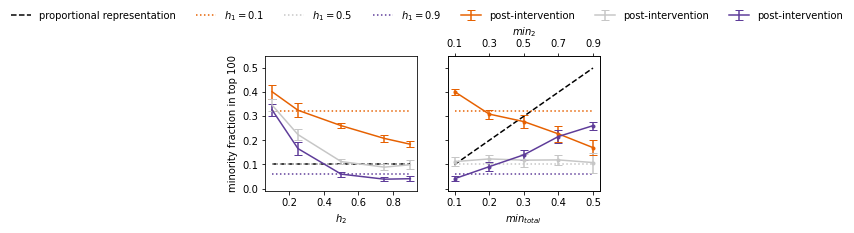

In [51]:
df_raw = pd.read_csv('results/ranking_results/results1.csv')
df1_raw = pd.read_csv('results/ranking_results/results2.csv')
coms = ['community 1']
k=100
df=prepare_data(df_raw,coms,k)
df1=prepare_data(df1_raw,coms,k)


com = 'community 1'
homophilies = [0.1, 0.25, 0.5, 0.75, 0.9]
minority = 0.1
key = "homophilies"

fig, (ax,ax1) = plt.subplots(1,2,figsize=(6, 3), sharey=True)

#ax.set_ylim([-0.05, 1.5])
ax.set_ylim([-0.01, 0.65])
ax.set_xlabel(r"$h_2$")
ax.set_ylabel("minority fraction in top 100")
title= "Full graph"
df_curr = df1.loc[df1.minority == minority,:]
colours = three_colours
prop_base = []
prop_base += len(homophilies) * [minority]
ax.plot(homophilies, prop_base, label=r"proportional representation", linestyle="dashed", color = prop_colour)
for i in range(len(df.homophilies.unique())):
    minority_sizes = df.iloc[i]["minority_fractions"][0]
    homophily = float(df.iloc[i]['homophilies'])
    res_local=[]
    res_local += len(homophilies) * [float(df.iloc[i][com]["res_global"])]
    m_place, s_place = calculate_mean(i,homophilies,key, df_curr,com,"res_global")
    ax.errorbar(homophilies, m_place, yerr=s_place, label=r"post-intervention", markersize=3, capsize=4, color = colours[i])
    ax.set_ylim([-0.05,1.05])
    ax.plot(homophilies, res_local, label=r"$h_1=%.1f$"%homophily, linestyle="dotted", color = colours[i])

homophilies = [0.1, 0.5, 0.9]
minority_fraction = [0.1,0.2,0.3,0.4,0.5]

ax1_2 = ax1.twiny()
#ax2_2 = ax2.twiny()

ax1.set_ylim([-0.01, 0.55])

ax1.set_xlabel(r"$min_{total}$")
#ax2.set_xlabel(r"$min_{total}$")
ax1_2.set_xlabel(r"$min_2$")
#ax2_2.set_xlabel(r"$min_2$")
    
    
final_value = [[],[],[]]
final_value_std = [[],[],[]]
for minority in minority_fraction:
   # df_curr = df1[ df1["minority"].isin({minority})]
    df_curr = df1.loc[df1.minority == minority,:]
    for i in range(len(df)):
        minority_sizes = df.iloc[i]["minority_fractions"][0]
        homophily = str(float(df.iloc[i]['homophilies']))
        label = "h= " + homophily 
        m_place, s_place = calculate_mean(i,homophilies,key, df_curr,com,"res_global")
        final_value[i].append(m_place)
        final_value_std[i].append(s_place)


plot_array_1 = np.swapaxes(np.array(final_value[0]),0,1)
plot_array_2 = np.swapaxes(np.array(final_value[2]),0,1)
plot_array_05 = np.swapaxes(np.array(final_value[1]),0,1)

plot_array_1_std = np.swapaxes(np.array(final_value_std[0]),0,1)
plot_array_2_std = np.swapaxes(np.array(final_value_std[2]),0,1)
plot_array_05_std = np.swapaxes(np.array(final_value_std[1]),0,1)

colours = two_colours
ax1.plot(minority_fraction,minority_fraction, label="proportional representation", linestyle="dashed", color = prop_colour)

ax1.plot(minority_fraction, 5*[float(df.iloc[0][com]["res_global"])],color = het01_colour, linestyle = "dotted",  label = r"$h_1=0.1$")
ax1.plot(minority_fraction, 5*[float(df.iloc[1][com]["res_global"])],color = rand05_colour, linestyle = "dotted",  label = r"$h_1=0.5$")
ax1.plot(minority_fraction, 5*[float(df.iloc[2][com]["res_global"])],color = hom09_colour, linestyle = "dotted",  label = r"$h_1=0.9$")


ax1.errorbar(minority_fraction, list(plot_array_1[0]), yerr=list(plot_array_1_std[i]), color = colours[0], label = r"$h_{2}=0.1$", markersize=3, capsize=4,  linestyle = "solid", marker = "o")

ax1.errorbar(minority_fraction, list(plot_array_05[1]),yerr=list(plot_array_05_std[i]),color = rand05_colour, label = r"$h_{2}=0.5$", markersize=3, capsize=4, linestyle = "solid", marker = "o")

ax1.errorbar(minority_fraction, list(plot_array_2[2]),yerr=list(plot_array_2_std[i]), color = colours[1], label = r"$h_{2}=0.9$", markersize=3, capsize=4, linestyle = "solid", marker = "o")

ax1.set_xticks(minority_fraction)
ax1_2.set_xticks( ax1.get_xticks() )
ax1_2.set_xbound(ax1.get_xbound())
ax1_2.set_xticklabels([final2quota(x) for x in ax1.get_xticks()])



handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,frameon=False, ncol=7, loc="upper center" )

handles1, labels1 = ax1.get_legend_handles_labels()
newLabels, newHandles, multiple = [], [], []
for handle, label in zip(handles1, labels1):
    if label not in labels:
        newLabels.append(label)
        newHandles.append(handle)

plt.subplots_adjust(top=0.75)

plt.savefig("./plots/strategy_shift_separate.pdf",bbox_inches='tight')



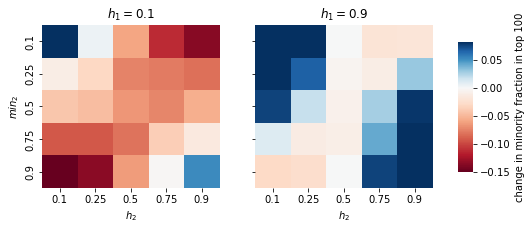

In [52]:
com = 'community 1'
homophilies = [0.1, 0.25, 0.5, 0.75, 0.9]
minority_fraction = [0.1,0.2,0.3,0.4,0.5]
quota = [0.1,0.25,0.5,0.75,0.9]
key = "homophilies"

df_raw = pd.read_csv('results/ranking_results/results1.csv')
coms = ['community 1']
k=100
df=prepare_data(df_raw,coms,k)


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7, 3), sharey=True, sharex = True)
ax1.set_title(r"$h_1=0.1$")
ax2.set_title(r"$h_1=0.9$")
ax.set_xlabel(r"quota intervention strength")
ax.set_ylabel(r"increased representation in top 100")
title= "Full graph"
df1_raw = pd.read_csv('results/ranking_results/results2.csv')
coms = ['community 1']
df1=prepare_data(df1_raw,coms,k)
het = [[],[],[]]
for minority in minority_fraction:
    df_curr = df1.loc[df1.minority == minority,:]
    colours = ["r", "b"]
    for i in range(len(df)):
        minority_sizes = df.iloc[i][r"minority_fractions"][0]
        homophily = str(float(df.iloc[i][r'homophilies']))
        label = "h= " + homophily 
        res_local=[]
        res_local += 5 * [float(df.iloc[i][com]["res_global"])]
        m_place, s_place = calculate_mean(i,homophilies,key, df_curr,com,"res_global")
        diff = np.subtract(m_place,res_local)
        het[i].append(diff)
cbar_ax = fig.add_axes([.95,.2,.03,.6])
divnorm=colors.TwoSlopeNorm(vcenter=0.)#,vmin=-.1,  vmax=.3)
sns.heatmap(np.vstack(het[0]), ax=ax1, vmin = -0.1, vmax = 0.3, xticklabels=homophilies, yticklabels=quota, cmap = "RdBu", cbar_ax = cbar_ax,cbar=True,norm = divnorm)
sns.heatmap(np.vstack(het[2]),ax=ax2, vmin = -0.1, vmax = 0.3, xticklabels=homophilies, yticklabels=quota, cmap = "RdBu", cbar_ax = cbar_ax,cbar_kws={'label':"change in minority fraction in top 100"}, norm = divnorm)
ax1.set_ylabel(r'$min_2$', fontsize = 10) # x-axis label with fontsize 15
ax1.set_xlabel(r'$h_2$', fontsize = 10) # y-axis label 
ax2.set_xlabel(r'$h_2$', fontsize = 10) # y-axis label 
plt.savefig("./plots/strategy_heatmap.pdf", bbox_inches='tight')
    

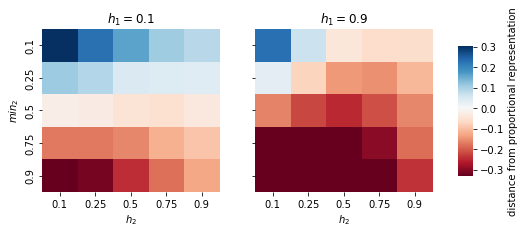

In [53]:
com = 'community 1'
homophilies = [0.1, 0.25, 0.5, 0.75, 0.9]
minority_fraction = [0.1,0.2,0.3,0.4,0.5]
quota = [0.1,0.25,0.5,0.75,0.9]
key = "homophilies"

df_raw = pd.read_csv('results/ranking_results/results1.csv')
coms = ['community 1']
k=100
df=prepare_data(df_raw,coms,k)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7, 3), sharey=True, sharex = True)
ax1.set_title(r"$h_1=0.1$")
ax2.set_title(r"$h_1=0.9$")
ax.set_xlabel(r"quota intervention strength")
ax.set_ylabel("increased representation in top 100")
title= "Full graph"
df1_raw = pd.read_csv('results/ranking_results/results2.csv')
coms = ['community 1']
df1=prepare_data(df1_raw,coms,k)
het = [[],[],[]]
for minority in minority_fraction:
    df_curr = df1.loc[df1.minority == minority,:]
    colours = ["r", "b"]
    prop_base = []
    prop_base += 5 * [minority]
    for i in range(len(df)):
        minority_sizes = df.iloc[i]["minority_fractions"][0]
        homophily = str(float(df.iloc[i]['homophilies']))
        label = "h= " + homophily 
        res_local=[]
        res_local += 5 * [float(df.iloc[i][com]["res_global"])]
        m_place, s_place = calculate_mean(i,homophilies,key, df_curr,com,"res_global")
        diff = np.subtract(m_place,prop_base)
        het[i].append(diff)
cbar_ax = fig.add_axes([.95,.2,.03,.6])
divnorm=colors.TwoSlopeNorm(vcenter=0.)
sns.heatmap(np.vstack(het[0]), ax=ax1,  xticklabels=homophilies, yticklabels=quota, cmap = "RdBu", cbar_ax = cbar_ax,cbar=True,norm = divnorm)
sns.heatmap(np.vstack(het[2]),ax=ax2, xticklabels=homophilies, yticklabels=quota, cmap = "RdBu", cbar_ax = cbar_ax,cbar_kws={'label':r"distance from proportional representation"}, norm = divnorm)
ax1.set_ylabel(r'$min_2$', fontsize = 10) 
ax1.set_xlabel(r'$h_2$', fontsize = 10)
ax2.set_xlabel(r'$h_2$', fontsize = 10) 
plt.savefig("./plots/strategy_heatmap_difference.pdf",bbox_inches='tight')
    

In [31]:
def plot_degree_growth_joint(N, homophily_1, homophily_2, minority_fraction_1, minority_fraction_2, ax=None):
    ax = ax or plt.gca()
    
    N_1 = N/2
    N_2 = N
    
    const = 10
    
    minority_growth_fraction = 2*minority_fraction_2 - minority_fraction_1
    
    path = "results/degree_growth_2phase/" + str(N) + "/50_50/"+ "min1_"+str(minority_fraction_1) + "/"+ "min2_"+str(minority_fraction_2) + "/" +str(homophily_1) + "/" +str(homophily_2) + "/" 
    with open(path + 'degree_min.pkl', 'rb') as f:
        time_dict_minority = pkl.load(f)
    with open(path +'degree_max.pkl', 'rb') as f:
        time_dict_majority = pkl.load(f)
    
    y = []
    x = []
    for k in time_dict_minority.keys():
        if k%50 != 0:
            continue
        else:
            v_list = time_dict_minority[k]
            y.append(np.mean(v_list))
            x.append(k)

    ax.scatter(x, y, color = min_colour, alpha = 1.0,label=r"minority (simulation)")

    y = []
    x = []
    for k in time_dict_majority.keys():
        if k%50 != 0:
            continue
        else:
            v_list = time_dict_majority[k]
            y.append(np.mean(v_list))
            x.append(k)


    ax.scatter(x, y, color = maj_colour, alpha = 1.0, label = r"majority (simulation)")

   
    ##### prediction #####
    beta_min_1, beta_maj_1 = analytical_prediction(homophily_1, minority_fraction_1)
    
    beta_min_2, beta_maj_2 = analytical_prediction_2(homophily_1, minority_fraction_1,homophily_2, minority_growth_fraction)
    
    #Phase 1
    x = np.arange(1, N_1, 10)
    offset_min = const**(-beta_min_1)
    
    predicted_value = (x**beta_min_1) * offset_min
    x_min_init = predicted_value[-1]/offset_min
    
    #ax.plot(x, predicted_value, label=r'$\beta_a^1$ = %.2f'%beta_min_1, linestyle='-', color='black')
    ax.plot(x, predicted_value, label=r'minority (analytics)', linestyle='-', color='black')
    
    offset_maj = const**(-beta_maj_1)
    
    predicted_value = (x**beta_maj_1) * offset_maj
    x_maj_init = predicted_value[-1]/offset_maj
    
   # ax.plot(x, predicted_value, label=r'$\beta_b^1$ = %.2f'%beta_maj_1, linestyle='--', color='black')
    ax.plot(x, predicted_value, label='majority (analytics)', linestyle='--', color='black')
    
    
    #Phase 2
    x = np.arange(N_1, N_2)
    
    beta_min_new = np.average([beta_min_1,beta_min_2],weights = [3,1])
    beta_maj_new = np.average([beta_maj_1,beta_maj_2],weights=[3,1])
    
    
    offset_min = const**(-beta_min_1)
    predicted_value = (x**beta_min_new+x_min_init -N_1**beta_min_new) * offset_min 
    
    part_2min, = ax.plot(x, predicted_value, linestyle='-', color='black')
    
    offset_maj = const**(-beta_maj_1)
    
    predicted_value = (x**beta_maj_new+x_maj_init-N_1**beta_maj_new) * offset_maj 
    
    part_2maj, = ax.plot(x, predicted_value, linestyle='--', color='black')
    
    ax.axvline(x=2500, ymin=0.0, ymax=1.0, color = "black", linestyle='--')
    ax.set_ylabel(r"$k(t)$")
    ax.set_xlabel(r"$t$")


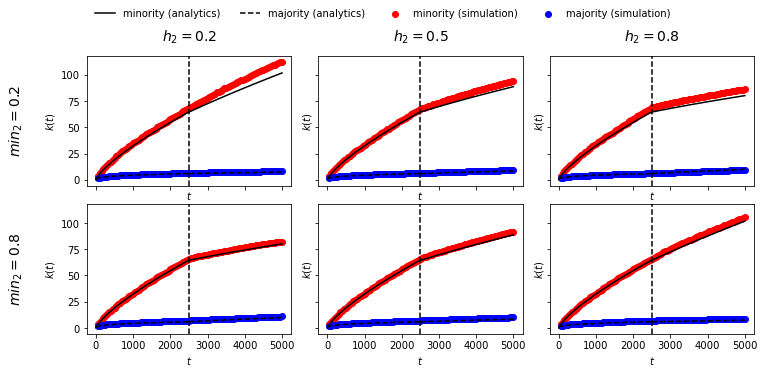

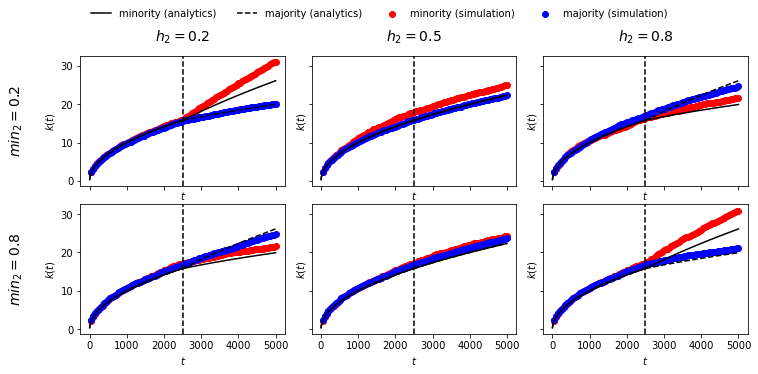

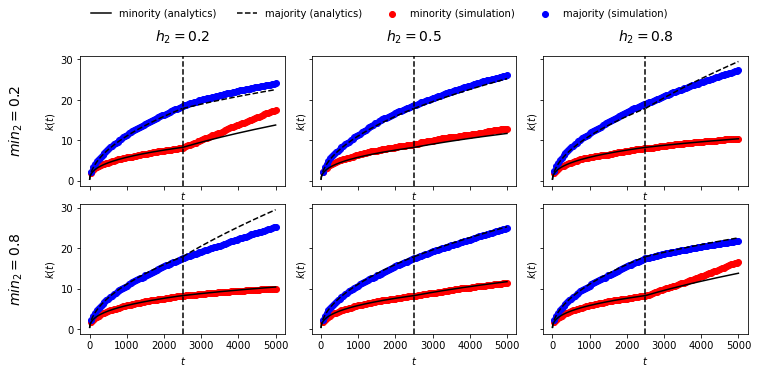

In [32]:
N=5000
h_1 = [0.2,0.5,0.8]
h_2 = [0.2,0.5,0.8]
min_1 = [0.2]
min_2 = [0.2,0.5]

for h1 in h_1:
    fig, axes = plt.subplots(2,len(h_2), figsize=(10,5), sharey=True, sharex=True)
    fig.tight_layout()
    
    cols = [r"$h_2=0.2$",r"$h_2=0.5$",r"$h_2=0.8$"]
    rows = [r"$min_2=0.2$",r"$min_2=0.8$"]
    
    pad = 15 # in points
    
    for ax, row in zip(axes[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90, fontsize=14 )
        
    for ax, col in zip(axes[0], cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline', fontsize=14)

    
    for i,h2 in enumerate(h_2):
        for min1 in min_1:
                plot_degree_growth_joint(N,h1,h2,min1,0.2,ax = axes[0,i])
                plot_degree_growth_joint(N,h1,h2,min1,0.5,ax = axes[1,i])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc = 'upper center', ncol=4,frameon=False)
    plt.subplots_adjust(top=0.85)
    plt.savefig("./plots/degree_growth_initial{0}.pdf".format(h1), bbox_inches='tight')
       
    

In [37]:
def degree_plots_joint_2(N,homophily_1,homophily_2,minority_fraction_1,minority_fraction_2_range):
    fig,axes= plt.subplots(2,4, figsize=(13,5),sharey=True) 
    plt.setp(axes.flat, xlabel='Degree')
    axes[0,0].set_ylabel("P(k)")
    axes[1,0].set_ylabel("P(k)")
    
    cols = [r"pre-intervention" "\n"r"$h_1={0}, min_1={1}$".format(homophily_1, minority_fraction_1), r"post-intervention""\n"r" $h_2={0}$".format(homophily_2), "new nodes", "old nodes" ]
    rows = [r"$min_2=0.2$",r"$min_2=0.8$"]
    
    pad = 15 # in points
    
    for ax, row in zip(axes[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90, fontsize=14 )
        
    for ax, col in zip(axes[0], cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline', fontsize=14)

    
    for column, minority_fraction_2 in enumerate(minority_fraction_2_range):
        path = "results/degree_growth_2phase/" + str(N) + "/50_50/"+ "min1_"+str(minority_fraction_1) + "/"+ "min2_"+str(minority_fraction_2) + "/" +str(homophily_1) + "/" +str(homophily_2) + "/" 



        with open(path +'graphs1.pkl', 'rb') as f:
            graph_list1 = pkl.load(f)
        with open(path +'graphs2.pkl', 'rb') as f:
            graph_list2 = pkl.load(f)

        m=2
        frequency_min1_total = defaultdict(list)
        frequency_min2_total = defaultdict(list)
        frequency_maj1_total = defaultdict(list)
        frequency_maj2_total = defaultdict(list)

        frequency_maj2_new_total = defaultdict(list)
        frequency_min2_new_total = defaultdict(list)
        frequency_maj2_old_total = defaultdict(list)
        frequency_min2_old_total = defaultdict(list)

        for it in range(len(graph_list1)):
            G=graph_list1[it]
            G2=graph_list2[it]

            degree1_min,frequency1_min = np.unique([d for n, d in G.degree() if G.nodes("minority")[n] == True], return_counts=True)
            degree2_min,frequency2_min = np.unique([d for n, d in G2.degree() if G2.nodes("minority")[n] == True], return_counts=True)
            degree1_maj,frequency1_maj = np.unique([d for n, d in G.degree() if G.nodes("minority")[n] == False], return_counts=True)
            degree2_maj,frequency2_maj = np.unique([d for n, d in G2.degree() if G2.nodes("minority")[n] == False], return_counts=True)

            degree2_min_new,frequency2_min_new = np.unique([d for n, d in G2.degree() if (n not in G.nodes("minority")) and G2.nodes("minority")[n] == True], return_counts=True)
            degree2_maj_new,frequency2_maj_new = np.unique([d for n, d in G2.degree() if (n not in G.nodes("minority")) and G2.nodes("minority")[n] == False], return_counts=True)
            degree2_min_old,frequency2_min_old = np.unique([d for n, d in G2.degree() if (n in G.nodes("minority")) and G2.nodes("minority")[n] == True], return_counts=True)
            degree2_maj_old,frequency2_maj_old = np.unique([d for n, d in G2.degree() if (n in G.nodes("minority")) and G2.nodes("minority")[n] == False], return_counts=True)


            for it,deg in zip(range(len(degree1_min)),degree1_min):
                frequency_min1_total[deg].append(frequency1_min[it]/G.number_of_nodes())
            for it,deg in zip(range(len(degree1_maj)),degree1_maj):
                frequency_maj1_total[deg].append(frequency1_maj[it]/G.number_of_nodes())
            for it,deg in zip(range(len(degree2_min)),degree2_min):
                frequency_min2_total[deg].append(frequency2_min[it]/G2.number_of_nodes())
            for it,deg in zip(range(len(degree2_maj)),degree2_maj):
                frequency_maj2_total[deg].append(frequency2_maj[it]/G2.number_of_nodes())

            for it,deg in zip(range(len(degree2_min_new)),degree2_min_new):
                frequency_min2_new_total[deg].append(frequency2_min_new[it]/G2.number_of_nodes())
            for it,deg in zip(range(len(degree2_maj_new)),degree2_maj_new):
                frequency_maj2_new_total[deg].append(frequency2_maj_new[it]/G2.number_of_nodes())
            for it,deg in zip(range(len(degree2_min_old)),degree2_min_old):
                frequency_min2_old_total[deg].append(frequency2_min_old[it]/G2.number_of_nodes())
            for it,deg in zip(range(len(degree2_maj_old)),degree2_maj_old):
                frequency_maj2_old_total[deg].append(frequency2_maj_old[it]/G2.number_of_nodes())


        axes[column,0].scatter(frequency_min1_total.keys(),[np.mean(a) for a in frequency_min1_total.values()] ,color = min_colour, label = "min1")
        axes[column,0].scatter(frequency_maj1_total.keys(),[np.mean(a) for a in frequency_maj1_total.values()] ,color = maj_colour, label = "maj1") 
        axes[column,0].loglog()
        axes[column,1].scatter(frequency_min2_total.keys(),[np.mean(a) for a in frequency_min2_total.values()] ,color = min_colour,  label = "min2") 
        axes[column,1].scatter(frequency_maj2_total.keys(),[np.mean(a) for a in frequency_maj2_total.values()] ,color = maj_colour, label = "maj2") 
        axes[column,1].loglog()
        axes[column,2].scatter(frequency_min2_new_total.keys(),[np.mean(a) for a in frequency_min2_new_total.values()] ,color = min_colour,  label = "min2") 
        axes[column,2].scatter(frequency_maj2_new_total.keys(),[np.mean(a) for a in frequency_maj2_new_total.values()] ,color = maj_colour, label = "maj2") 
        #ax_3.loglog()
        axes[column,3].scatter(frequency_min2_old_total.keys(),[np.mean(a) for a in frequency_min2_old_total.values()] ,color = min_colour,  label = "minority") 
        axes[column,3].scatter(frequency_maj2_old_total.keys(),[np.mean(a) for a in frequency_maj2_old_total.values()] ,color = maj_colour, label = "majority") 
        axes[column,3].loglog()
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc = 'center left', ncol=1, frameon=False)
    #plt.subplots_adjust(top=0.85)
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.04)
    plt.savefig("./plots/degree_distributions_initial{0}_final{1}.pdf".format(homophily_1, homophily_2))
       # axes[column,0].set_title("Initial graph with h={0} and min={1}".format(homophily_1, minority_fraction_1))


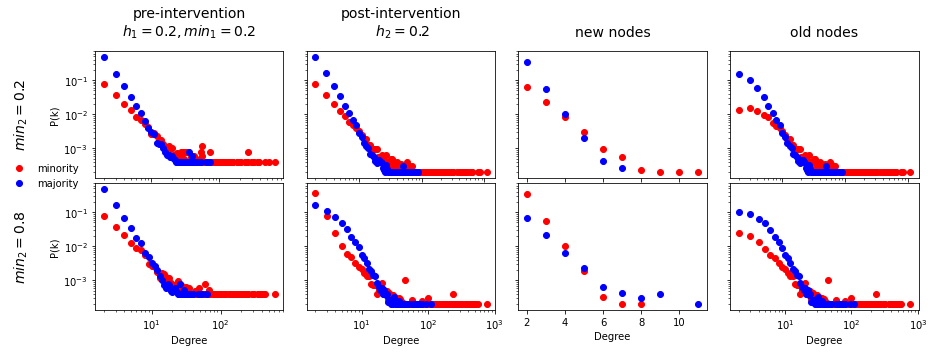

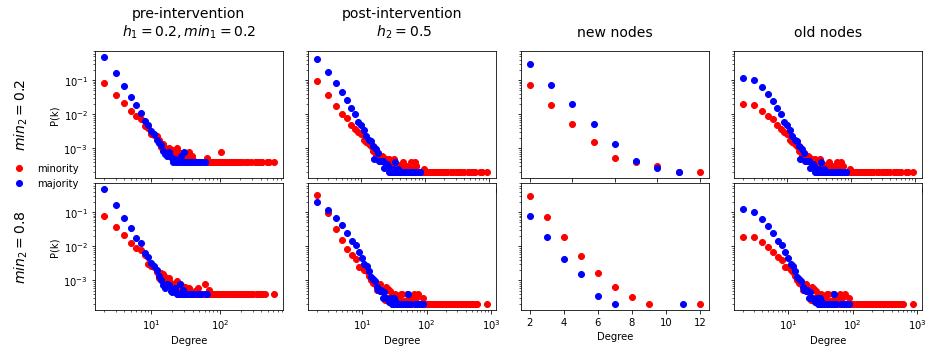

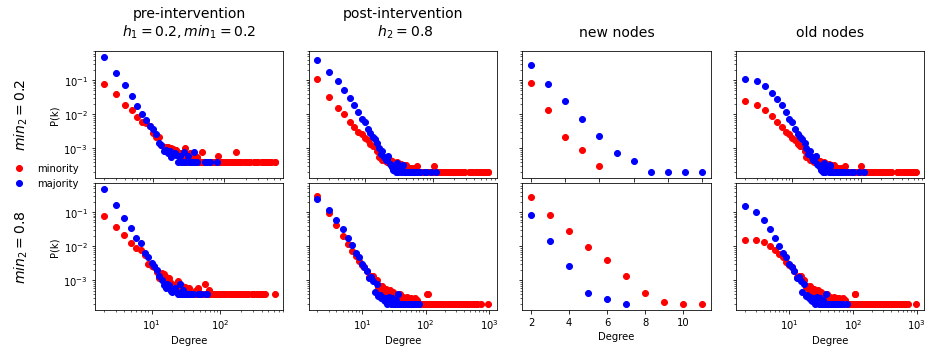

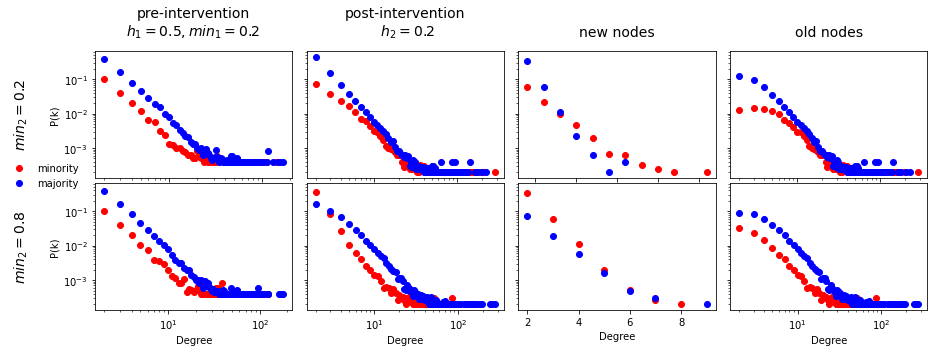

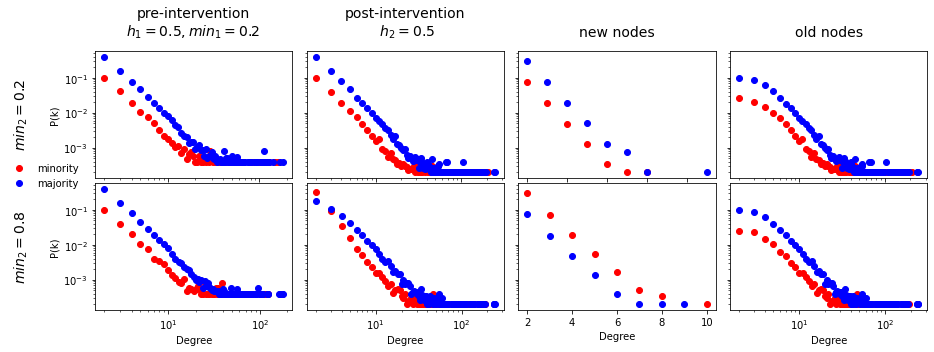

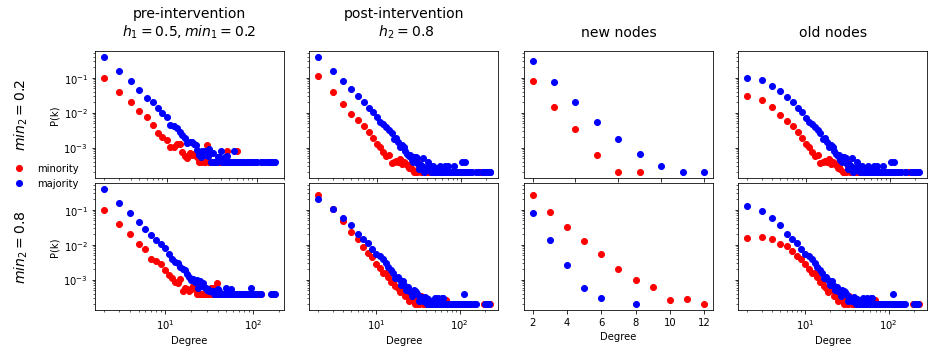

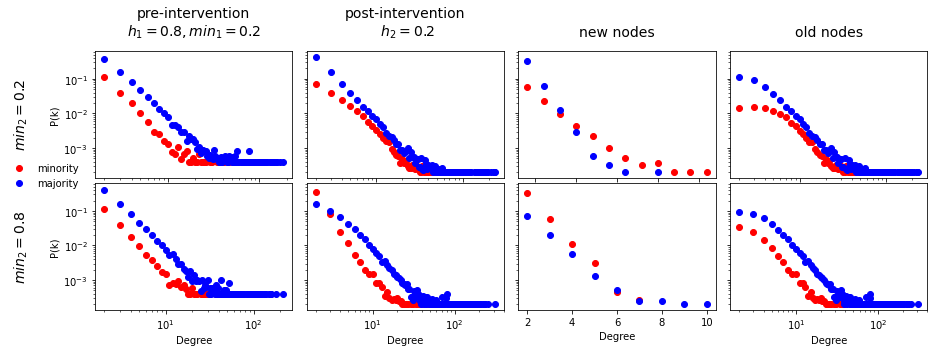

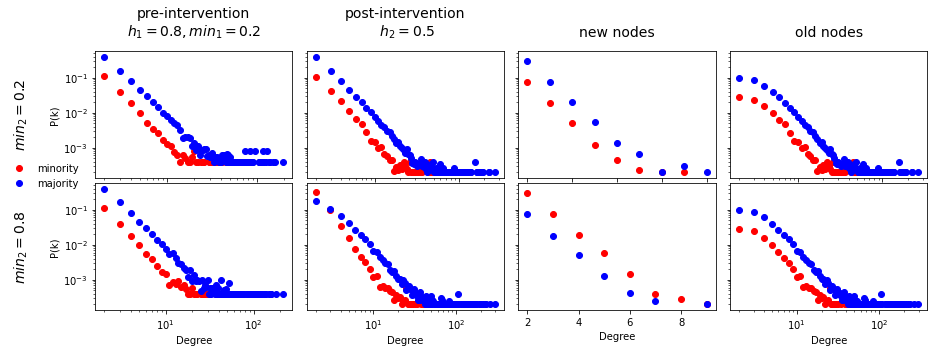

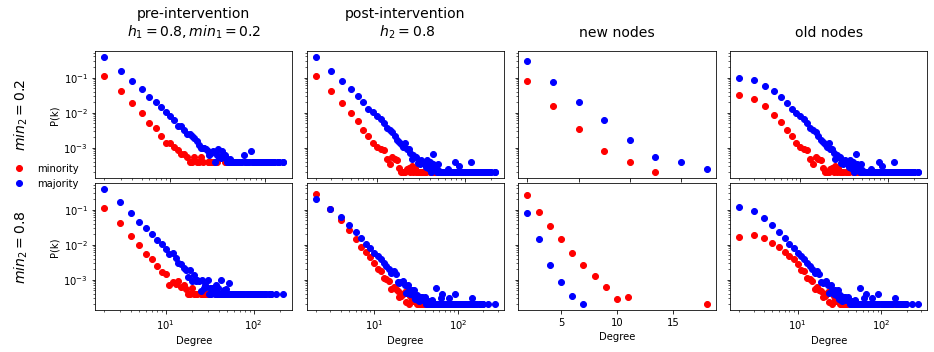

In [38]:
N=5000
h_1 = [0.2,0.5,0.8]
h_2 = [0.2,0.5,0.8]
min_2 = [0.2,0.5]

for h1 in h_1:
    for h2 in h_2:
        degree_plots_joint_2(N,h1,h2,0.2,min_2)